<a href="https://colab.research.google.com/github/noel-odero/Formative3/blob/main/Part1_Bivariate_Normal_Distribution_African_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q datasets pandas numpy matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from datasets import load_dataset


In [ ]:
ds = load_dataset("electricsheepafrica/Energy-Indicators-For-African-Countries")

if isinstance(ds, dict):
  # for dict, we have train, validation and test, we choose train : learn data patterns
  key = list(ds.keys())[0]
  df = ds[key].to_pandas()
else:
  df = ds.to_pandas()  #convert hugging face dataset into pandas df

print("Data shape:", df.shape)
df.head()

Resolving data files:   0%|          | 0/54 [00:00<?, ?it/s]

Data shape: (3510, 5)


,Year,access_to_clean_fuels_and_technologies_for_cooking_of_population_,access_to_electricity_of_population_,alternative_and_nuclear_energy_of_total_energy_use_,electric_power_consumption_kwh_per_capita_
0,1960-01-01,96.4,98.6,0.05,539.608391
1,1961-01-01,96.4,98.6,0.05,539.608391
2,1962-01-01,96.4,98.6,0.05,539.608391
3,1963-01-01,96.4,98.6,0.05,539.608391
4,1964-01-01,96.4,98.6,0.05,539.608391


In [ ]:

print("\ndataframe columns:")
print(df.columns)
print("\ndataframe info")
df.info()


dataframe columns:
Index(['Year',
       'access_to_clean_fuels_and_technologies_for_cooking_of_population_',
       'access_to_electricity_of_population_',
       'alternative_and_nuclear_energy_of_total_energy_use_',
       'electric_power_consumption_kwh_per_capita_'],
      dtype='object')

dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 5 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Year                                                               3510 non-null   object 
 1   access_to_clean_fuels_and_technologies_for_cooking_of_population_  3445 non-null   float64
 2   access_to_electricity_of_population_                               3510 non-null   float64
 3   alternative_and_nuclear_energy_of_total_energy_use_                2405 non-null   float64
 4   e

In [ ]:
# data cleaning
col_x = 'access_to_electricity_of_population_'
col_y = 'electric_power_consumption_kwh_per_capita_'

data = df[[col_x, col_y]].dropna()
x = data[col_x].values
y = data[col_y].values
print('\nColumn X')
print(x)
print('\nColumn y')
print(y)


Column X
[98.6 98.6 98.6 ... 50.1 62.  62. ]

Column y
[539.60839083 539.60839083 539.60839083 ... 538.79954118 538.79954118
 538.79954118]


Now the formula for the PDF  which can also be written as f(x,y) is
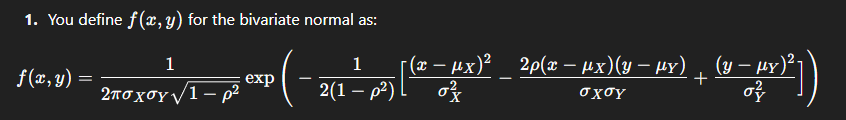


Now You have to get the following

1.   rho, that is the population correlation which requires covariance to compute
2.   Covariance which requires means of x and y
3.   Mean of both x and y
4. Standard deviations of both x and y, referred also as sigma
4.   The first fraction before the exp is the normalizing constant to ensure that the pdf results to 0
5. Create a function to avoid repetition





In [ ]:
# Means

mu1 = np.mean(x)
mu2 = np.mean(y)

print(mu1)
print(mu2)

38.679083289961305
495.69166712537657


In [ ]:
# Standard deviation(stdx, stdy)
# use ddof=1 to give sample standard deviation (divides by n-1)

sigma1 = np.std(x, ddof=1)
sigma2 = np.std(y, ddof=1)
covariance = np.mean((x - mu1) * (y - mu2))
rho = covariance / (sigma1 * sigma2)
print(rho)

0.5318844851759386


Understanding ρ (rho):



*   ρ = 0: No linear correlation
*   0 < |ρ| < 0.3: Weak correlation
*   0.3 ≤ |ρ| < 0.7: Moderate correlation
*   0.7 ≤ |ρ| ≤ 1: Strong correlation
*   ρ > 0: Positive correlation (both increase together)
*   ρ < 0: Negative correlation (one increases, other decreases)

In [ ]:
# Implementing the Bivariate Normal PDF


# Normalization Constant
normalization = 1.0 / ( 2 * np.pi * sigma1 * sigma2 * np.sqrt(1 - rho**2))

print("\nNormalization:")
print(normalization)

# Standardiza variables
x_norm = (x - mu1) / sigma1
y_norm = (y - mu2) / sigma2

print("\nNormalized x")
print(x_norm)
print("\n Normalized y")
print(y_norm)

#Calculate the quadratic form
z = (x_norm**2 - 2*rho*x_norm*y_norm + y_norm**2) / (1 - rho**2)

print("\nZ")
print(z)

# Calculate the PDF

pdf = normalization * np.exp(-0.5 * z)

print("\nPDF")
print(pdf)



Normalization:
7.481681597884054e-06

Normalized x
[1.92294467 1.92294467 1.92294467 ... 0.36651293 0.74840031 0.74840031]

 Normalized y
[0.05447663 0.05447663 0.05447663 ... 0.05347329 0.05347329 0.05347329]

Z
[5.00523461 5.00523461 5.00523461 ... 0.16224078 0.72568929 0.72568929]

PDF
[6.12528551e-07 6.12528551e-07 6.12528551e-07 ... 6.89872898e-06
 5.20496477e-06 5.20496477e-06]


In [ ]:
# Function implementation to avoid repetition

def bivariate_normal_pdf(x, y, mu1, mu2, sigma1, sigma2, rho):
    normalization = 1.0 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1 - rho**2))
    x_norm = (x - mu1) / sigma1
    y_norm = (y - mu2) / sigma2
    z = (x_norm**2 - 2*rho*x_norm*y_norm + y_norm**2) / (1 - rho**2)
    return normalization * np.exp(-0.5 * z)


pdf_values = bivariate_normal_pdf(x, y, mu1, mu2, sigma1, sigma2, rho)
print(f"Min PDF: {np.min(pdf_values)}")
print(f"Max PDF: {np.max(pdf_values)}")
print(f"Mean PDF: {np.mean(pdf_values)}")


Min PDF: 4.172250545367718e-13
Max PDF: 7.4327379479260235e-06
Mean PDF: 4.382094351092646e-06


Understanding PDF values:

*   High PDF: Point is close to the distribution's center (μ₁, μ₂)
*   Low PDF: Point is far from the center (in the tails)
*   PDF values can exceed 1.0! (Because it's probability density, not probability)


In [ ]:
# Define grid range
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

# Create 100x100 grid
x_grid = np.linspace(x_min - 0.2*(x_max-x_min),
                     x_max + 0.2*(x_max-x_min), 100)
y_grid = np.linspace(y_min - 0.2*(y_max-y_min),
                     y_max + 0.2*(y_max-y_min), 100)

X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# Calculate PDF for entire grid
Z_grid = bivariate_normal_pdf(X_grid, Y_grid, mu1, mu2, sigma1, sigma2, rho)

print(Z_grid)

[[8.12336659e-07 8.58015147e-07 9.03690776e-07 ... 2.94313717e-10
  2.35977543e-10 1.88667389e-10]
 [8.92860781e-07 9.45773505e-07 9.98979400e-07 ... 4.27143850e-10
  3.43462102e-10 2.75390835e-10]
 [9.71393097e-07 1.03191257e-06 1.09309218e-06 ... 6.13622653e-10
  4.94823759e-10 3.97892449e-10]
 ...
 [1.71930303e-23 2.39787914e-23 3.33478735e-23 ... 3.19061953e-15
  3.37793393e-15 3.56609801e-15]
 [7.01562845e-24 9.81264162e-24 1.36858346e-23 ... 1.71911580e-15
  1.82526430e-15 1.93246829e-15]
 [2.83363759e-24 3.97473480e-24 5.55952901e-24 ... 9.16851115e-16
  9.76256499e-16 1.03656145e-15]]


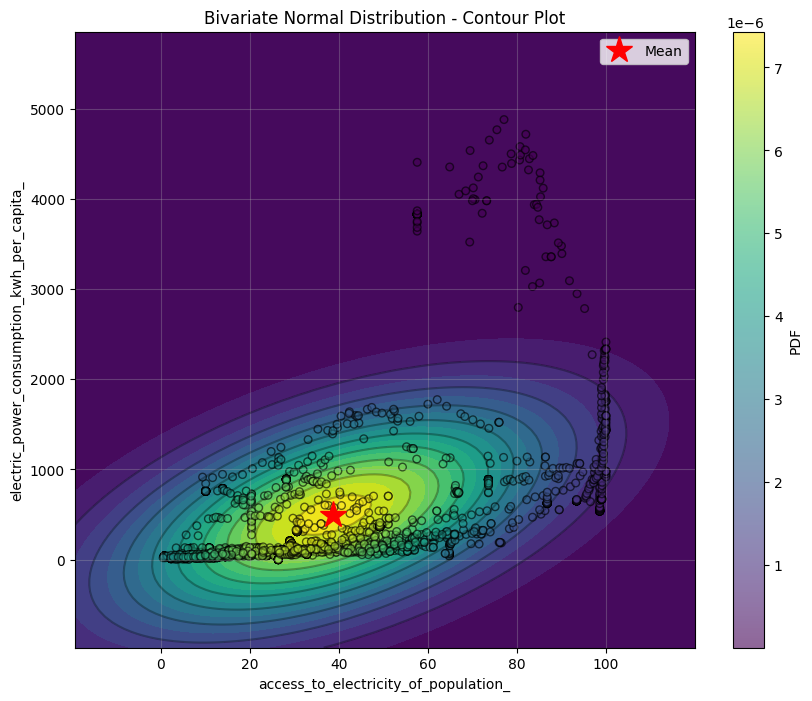

In [ ]:
plt.figure(figsize=(10, 8))

# Filled contours (colored regions)
plt.contourf(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis')

# Line contours (outlines)
plt.contour(X_grid, Y_grid, Z_grid, levels=10, colors='black', alpha=0.3)

# Plot actual data points
plt.scatter(x, y, c=pdf_values, s=30, cmap='viridis',
            edgecolors='black', alpha=0.6)

# Mark the mean
plt.plot(mu1, mu2, 'r*', markersize=20, label='Mean')

plt.colorbar(label='PDF')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.title('Bivariate Normal Distribution - Contour Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

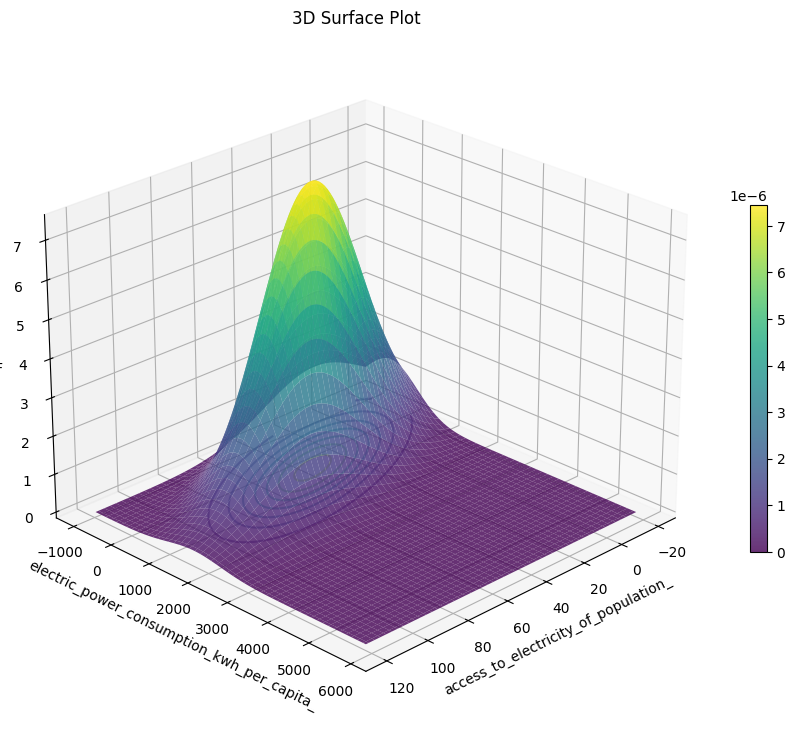

In [ ]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Create surface
surf = ax.plot_surface(X_grid, Y_grid, Z_grid,
                       cmap='viridis', alpha=0.8)

# Add projection on bottom
ax.contour(X_grid, Y_grid, Z_grid, zdir='z',
           offset=0, cmap='viridis', alpha=0.5)

ax.set_xlabel(col_x)
ax.set_ylabel(col_y)
ax.set_zlabel('PDF')
ax.set_title('3D Surface Plot')
ax.view_init(elev=25, azim=45)  # Adjust viewing angle

plt.colorbar(surf, shrink=0.5)
plt.show()